In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youtube/GB_category_id.json
/kaggle/input/youtube/GBvideos.csv
/kaggle/input/youtube/GBcomments.csv
/kaggle/input/youtube/USvideos.csv
/kaggle/input/youtube/US_category_id.json
/kaggle/input/youtube/UScomments.csv


In [2]:
df=pd.read_csv('/kaggle/input/youtube/UScomments.csv',usecols=range(4))

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.columns=['video_id','comment_text','likes','replies']

# **Preprocessing(firstly dealing with the explicit(direct) comments)**

In [4]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691407 entries, 0 to 691406
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691407 non-null  object
 1   comment_text  691382 non-null  object
 2   likes         691407 non-null  object
 3   replies       691407 non-null  object
dtypes: object(4)
memory usage: 21.1+ MB


** From above result it means comment_text field contains some NaN values**

In [6]:
df['comment_text'].isnull().sum() #counting the columns with Nan Values

25

In [7]:
df.dropna(inplace=True) #removing the rows with Nan values in the field 'comment_text'

In [8]:
df.info() #it can be seen that 25 rows have been removed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691382 entries, 0 to 691406
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691382 non-null  object
 1   comment_text  691382 non-null  object
 2   likes         691382 non-null  object
 3   replies       691382 non-null  object
dtypes: object(4)
memory usage: 26.4+ MB


**We will use VADER as it was developed to be put to use for social media texts**

In [9]:
pip install vaderSentiment

     |████████████████████████████████| 125 kB 644 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [10]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

**Calculating the scores using VADER and appending the scores in corresponding cols in dataframe**

In [11]:
pos=[]
neg=[]
neu=[]
comp=[]
sia_obj=SentimentIntensityAnalyzer()
for i in df.comment_text.values:
    sia_values_dict=sia_obj.polarity_scores(i)
    pos.append(sia_values_dict['pos'])
    neg.append(sia_values_dict['neg'])
    neu.append(sia_values_dict['neu'])
    comp.append(sia_values_dict['compound'])

In [12]:
df['positive']=pos
df['negative']=neg
df['neutral']=neu
df['compound']=comp

In [13]:
df.head()

,video_id,comment_text,likes,replies,positive,negative,neutral,compound
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000,0.0,1.000,0.0000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000,0.0,1.000,0.0000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000,0.0,1.000,0.0000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.503,0.0,0.497,0.4648
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000,0.0,1.000,0.0000


In [14]:
df.iloc[[5786]] #checking any random row's value

,video_id,comment_text,likes,replies,positive,negative,neutral,compound
5786,zAXn-v9RdXo,Storm was over exaggerated,5,1,0.0,0.318,0.682,-0.1027


**Now adding a column comment_type(according to the compound score). For df['compound']>0 comment_type=1,for df['compound']<0 comment_type=-1,for df['compound']=0 comment_type=0**

In [15]:
comment_type=[]
for i in df.compound.values:
    if i>0:
        comment_type.append(1)
    elif i<0:
        comment_type.append(-1)
    else:
        comment_type.append(0)
df['comment_type']=comment_type

In [16]:
df.head()

,video_id,comment_text,likes,replies,positive,negative,neutral,compound,comment_type
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000,0.0,1.000,0.0000,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000,0.0,1.000,0.0000,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000,0.0,1.000,0.0000,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.503,0.0,0.497,0.4648,1
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000,0.0,1.000,0.0000,0


**Later on you can change the values of comment_type (-1,0,1) with (offensive/negative,neutral,positive) comments respectively**

**Displaying the positive comments with compound score in descending order**

In [17]:
df_most_positive=df[df.comment_type==1].sort_values(by='compound',ascending=False)

In [18]:
df_most_positive.head()

,video_id,comment_text,likes,replies,positive,negative,neutral,compound,comment_type
302888,DtsWj9XiOIY,Congratulations😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘😘...,0,0,0.484,0.000,0.516,1.0,1
360823,5PaDeyRNUyc,💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖💖...,0,0,1.000,0.000,0.000,1.0,1
348429,scQBjsQNgVQ,💓💓💓💓💓💓💓💓💓💓💓❤❤❤❤❤❤❤💜💜💜😇💜💜💙💙💙💙💙💙💙💙💙💙💙💜💜💜💜💜💜💜💜💜❤❤...,0,0,0.741,0.116,0.143,1.0,1
620843,CNwYcyRAl1Y,KING OF POP FOREVER😍😍😍😍😍💓💔💕💖💙💚💚💚❣💟💞💝💞❣💟💟💞💞💞❤❤❤...,8,0,0.791,0.021,0.188,1.0,1
510515,-LoSw4o2zDQ,You are so cute😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊...,0,0,0.666,0.000,0.334,1.0,1


In [19]:
print(df_most_positive.shape[0])        #cross-checking that our df_most_positive and no of positive comments in our original
print(df[df.comment_type==1].shape[0])  # dataframe contain the same no of entries

343620
343620


# **Now displaying the word-cloud to display the most used words in the positive type comments**

(-0.5, 1199.5, 599.5, -0.5)

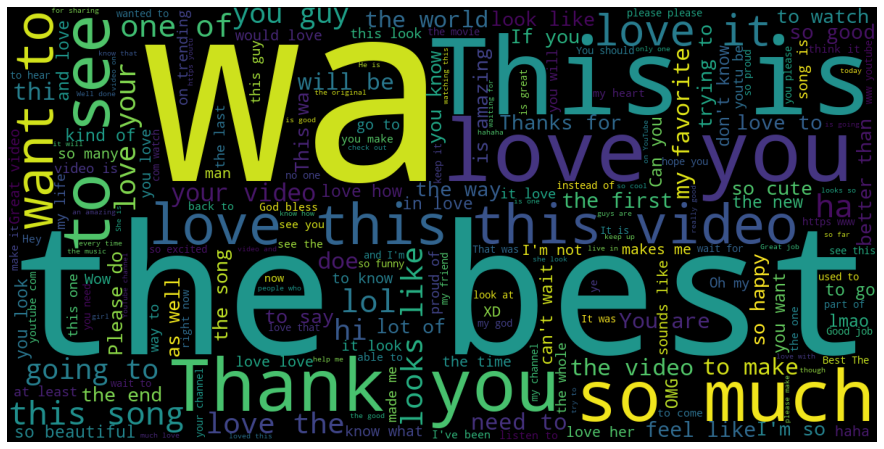

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

k=(' '.join(df_most_positive['comment_text']))
wordcloud=WordCloud(width=1200,height=600).generate(k)
plt.figure(figsize=(18,8))
plt.imshow(wordcloud)
plt.axis('off')

**Displaying the negative comments with compound score in ascending order(since most negative comments have lowest compound score)**

In [21]:
df_most_negative=df[df.comment_type==-1].sort_values(by='compound',ascending=True)

In [22]:
df_most_negative.head()

,video_id,comment_text,likes,replies,positive,negative,neutral,compound,comment_type
84010,sgBGvgxuXvQ,PLEASE DO MACARONS!!!!! 😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬...,0,0,0.001,0.705,0.294,-1.0,-1
620175,XIQW-1JQDMA,Is tarzan elsa and annas brother please do a t...,0,0,0.002,0.747,0.251,-1.0,-1
103415,sgBGvgxuXvQ,PLEASE DO MACARONS!!!!! 😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬😬...,0,0,0.001,0.705,0.294,-1.0,-1
356050,Wp21hAL1mOU,I don't have HOLO😢😢😢😢😢😢😢😢😢😢😢😢😢😢😢😢😢😢😢😢😢😢😢😢😢😢😢😢😢...,0,0,0.002,0.650,0.348,-1.0,-1
196,cLdxuaxaQwc,nigger nigger nigger nigger nigger nigger nigg...,0,0,0.000,1.000,0.000,-1.0,-1


In [23]:
df_most_negative.tail()

,video_id,comment_text,likes,replies,positive,negative,neutral,compound,comment_type
507061,CrwmpuwLBiI,I really liked the trailer. I do have worries ...,0,0,0.093,0.093,0.814,-0.0009,-1
201025,RlduVwzqK2o,I would really love to know how Tracee keeps h...,0,0,0.147,0.097,0.756,-0.0009,-1
521108,Q0CbN8sfihY,Doesn't look as good as Phantom Menace or Atta...,1,0,0.162,0.247,0.591,-0.0008,-1
18065,l864IBj7cgw,"Never done axe throwing, but I doubt the googl...",0,0,0.182,0.182,0.637,-0.0005,-1
402209,6v3BWoddSgk,What a cuck another programmed simp yes female...,0,0,0.102,0.102,0.795,-0.0005,-1


# Now displaying the word-cloud to display the most used words in the negative type comments

(-0.5, 1199.5, 599.5, -0.5)

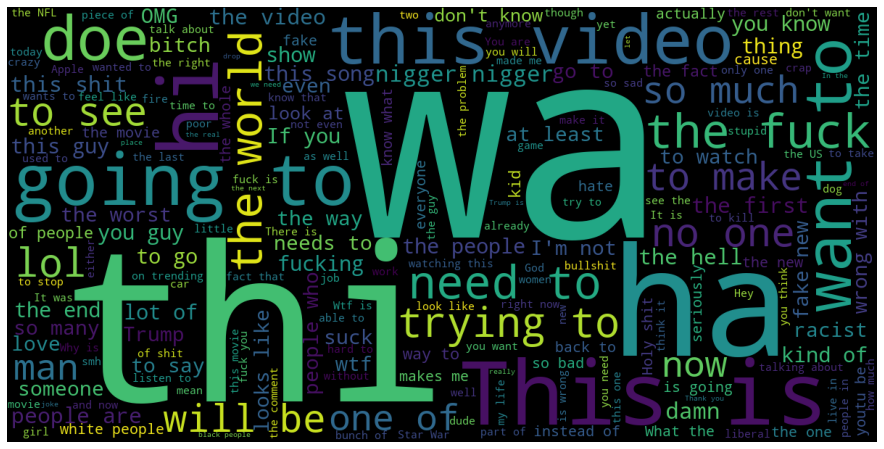

In [24]:
k=(' '.join(df_most_negative['comment_text']))
wordcloud=WordCloud(width=1200,height=600).generate(k)
plt.figure(figsize=(18,8))
plt.imshow(wordcloud)
plt.axis('off')

# Counting the no of comments of each types

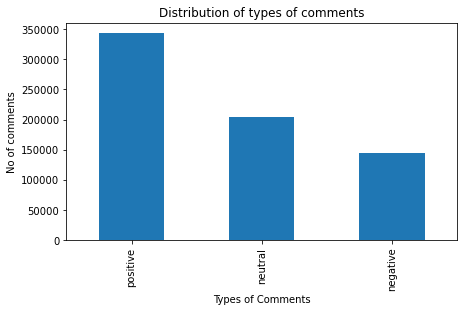

In [25]:
df['comment_type'].replace({1:'positive',0:'neutral',-1:'negative'}).value_counts().plot(kind='bar',figsize=(7,4));
plt.title("Distribution of types of comments");
plt.xlabel("Types of Comments");
plt.ylabel("No of comments");

# Now creating a dataset grouped by video_id's

In [26]:
vid_id=[]
pos_comm=[]
neg_comm=[]
neu_comm=[]
for i in set(df.video_id):
    vid_id.append(i)
    try:    
        pos_comm.append(df[df.video_id==i].comment_type.value_counts()[1])
    except:
        pos_comm.append(0)
    try:    
        neg_comm.append(df[df.video_id==i].comment_type.value_counts()[-1])
    except:
        neg_comm.append(0)
    try:    
        neu_comm.append(df[df.video_id==i].comment_type.value_counts()[0])
    except:
        neu_comm.append(0)

In [27]:
df_unique = pd.DataFrame(vid_id)
df_unique.columns=['vid_id']
df_unique['pos_comm'] =pos_comm
df_unique['neg_comm'] = neg_comm
df_unique['neu_comm'] = neu_comm
df_unique['total_comments']=df_unique['pos_comm']+df_unique['neg_comm']+df_unique['neu_comm']
df_unique.head(6)

,vid_id,pos_comm,neg_comm,neu_comm,total_comments
0,y5lIKZoN1_0,18,0,13,31
1,3TDk34hnSXc,167,67,166,400
2,Bn7ZtoFTm2Y,165,7,28,200
3,xch78xg1DVc,25,33,32,90
4,-JmNKGfFj7w,89,62,49,200
5,S6Mnl6kocLw,172,155,73,400


# Saving this dataframe

In [28]:
df_unique.to_csv('unique.csv',header=False,)

# Displaying the most upvoted comments

**At index 41587 the value in likes column is "FoxSearchLight" so overwriting it with 0**

In [29]:
df.at[41587,"likes"]="0"

In [30]:
df.iloc[[41587]]

,video_id,comment_text,likes,replies,positive,negative,neutral,compound,comment_type
41587,_ANP3HR1jsM,My dad raised Razor's Edge Pitbulls. If you fa...,0,1,0.051,0.123,0.826,-0.7253,-1


In [31]:
df.iloc[[41588]]

,video_id,comment_text,likes,replies,positive,negative,neutral,compound,comment_type
41588,_ANP3HR1jsM,comment_text,likes,replies,0.0,0.0,1.0,0.0,0


In [32]:
df.at[41588,"likes"]="0"
df.at[41588,"replies"]="0"
df.iloc[[41588]]

,video_id,comment_text,likes,replies,positive,negative,neutral,compound,comment_type
41588,_ANP3HR1jsM,comment_text,0,0,0.0,0.0,1.0,0.0,0


In [33]:
df.iloc[[114462]]

,video_id,comment_text,likes,replies,positive,negative,neutral,compound,comment_type
114463,RLmqKBRqyA8,"norm is a lego weapon\r\ntBN9kLaS-uw,Jenna is ...","forever my girl crush 😍""",0,0.352,0.155,0.493,0.5847,1


**the index of above row reads as 114463 so you have to change at 114463 but its index in dataframe is 114462**

In [34]:
df.at[114463,"likes"]="0"
df.iloc[[114462]]

,video_id,comment_text,likes,replies,positive,negative,neutral,compound,comment_type
114463,RLmqKBRqyA8,"norm is a lego weapon\r\ntBN9kLaS-uw,Jenna is ...",0,0,0.352,0.155,0.493,0.5847,1


In [35]:
df.iloc[[142493]]
df.at[142494,"likes"]="0"
df.at[142494,"replies"]="0"
df.iloc[[142493]]

,video_id,comment_text,likes,replies,positive,negative,neutral,compound,comment_type
142494,0ptNpGfMRCg,*Are уou looking fоr hоt dates in yоur nеighbo...,0,0,0.116,0.0,0.884,0.5267,1


In [36]:
df.iloc[[189729]]

,video_id,comment_text,likes,replies,positive,negative,neutral,compound,comment_type
189730,zTTaFg2Sq9Y,Great Nice video\nMore New Girls Mastiii Vide...,and even better to see Brie out there support...,like always. It will always be the Bella Twin...,0.329,0.0,0.671,0.9722,1


In [37]:
df.at[189730,"likes"]="0"
df.at[189730,"replies"]="0"
df.iloc[[189729]]

,video_id,comment_text,likes,replies,positive,negative,neutral,compound,comment_type
189730,zTTaFg2Sq9Y,Great Nice video\nMore New Girls Mastiii Vide...,0,0,0.329,0.0,0.671,0.9722,1


In [38]:
df.iloc[[388421]]

,video_id,comment_text,likes,replies,positive,negative,neutral,compound,comment_type
388428,MfbNXanrhGA,Hi am miss Clara from United States of America...,but shes delicate right now... Girl me too Su...,31,0.185,0.035,0.78,0.9913,1


In [39]:
df.at[388428,"likes"]="0"
df.iloc[[388421]]

,video_id,comment_text,likes,replies,positive,negative,neutral,compound,comment_type
388428,MfbNXanrhGA,Hi am miss Clara from United States of America...,0,31,0.185,0.035,0.78,0.9913,1


In [40]:
df[["likes"]]=df[["likes"]].apply(pd.to_numeric)
df_most_upvoted=df.sort_values(by='likes',ascending=False)

In [41]:
df_most_upvoted

,video_id,comment_text,likes,replies,positive,negative,neutral,compound,comment_type
167070,0R7MQwmbiQc,What if Mable was the duck??,48772,501,0.000,0.000,1.000,0.0000,0
149534,0R7MQwmbiQc,What if Mable was the duck??,47785,501,0.000,0.000,1.000,0.0000,0
127156,0R7MQwmbiQc,What if Mable was the duck??,45316,500,0.000,0.000,1.000,0.0000,0
106257,0R7MQwmbiQc,What if Mable was the duck??,39530,500,0.000,0.000,1.000,0.0000,0
653310,hkA2a4_tNOs,I thought that the sad clown emoji represented...,30228,500,0.000,0.292,0.708,-0.7351,-1
...,...,...,...,...,...,...,...,...,...
252941,7-z55AKa07U,Wow i live in st.louis,0,0,0.487,0.000,0.513,0.5859,1
252942,7-z55AKa07U,Please make an extra large hot pocket,0,0,0.277,0.000,0.723,0.3182,1
252943,7-z55AKa07U,How does Julia know what a diaper tastes like?,0,0,0.238,0.000,0.762,0.3612,1
252944,7-z55AKa07U,"St.Louis is my hometown , so funny to see you ...",0,0,0.286,0.105,0.609,0.9436,1


# Calculating the length of comment's and removing the stopwords from comments

In [42]:
df["comment_length"]=df.comment_text.apply(len)
df.head()

,video_id,comment_text,likes,replies,positive,negative,neutral,compound,comment_type,comment_length
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000,0.0,1.000,0.0000,0,33
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000,0.0,1.000,0.0000,0,87
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000,0.0,1.000,0.0000,0,34
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.503,0.0,0.497,0.4648,1,19
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000,0.0,1.000,0.0000,0,10


In [43]:
#next task 1)remove column comment_length and 2)inspect column cleaned_text and 3)add a new column comment_length(excluding the stopwords)
#reference: https://stackoverflow.com/questions/37483470/how-to-calculate-number-of-words-in-a-string-in-dataframe

In [44]:
df.drop(["comment_length"],axis=1,inplace=True)
df.head()

,video_id,comment_text,likes,replies,positive,negative,neutral,compound,comment_type
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000,0.0,1.000,0.0000,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000,0.0,1.000,0.0000,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000,0.0,1.000,0.0000,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.503,0.0,0.497,0.4648,1
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000,0.0,1.000,0.0000,0


In [45]:
import string
from nltk.corpus import stopwords

def text_process(mssg):
    STOPWORDS=stopwords.words('english')
    return ' '.join([word for word in mssg.split() if word.lower() not in STOPWORDS])

df["cleaned_text"]=df.comment_text.apply(text_process)
df.head()

,video_id,comment_text,likes,replies,positive,negative,neutral,compound,comment_type,cleaned_text
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000,0.0,1.000,0.0000,0,Logan Paul yo big day ‼️‼️‼️
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000,0.0,1.000,0.0000,0,I've following start vine channel seen 365 vlogs
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000,0.0,1.000,0.0000,0,Say hi Kong maverick
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.503,0.0,0.497,0.4648,1,FAN . attendance
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000,0.0,1.000,0.0000,0,trending 😉


In [46]:
df.iloc[[3478]]

,video_id,comment_text,likes,replies,positive,negative,neutral,compound,comment_type,cleaned_text
3478,oDIDZ9EmQfA,Love these Vlogsss,0,0,0.677,0.0,0.323,0.6369,1,Love Vlogsss


In [47]:
df.iloc[[56789]]

,video_id,comment_text,likes,replies,positive,negative,neutral,compound,comment_type,cleaned_text
56789,CuXq1hOa8_Y,I am hoping that the world will come to realiz...,0,0,0.043,0.211,0.746,-0.8573,-1,hoping world come realize Islam religion Demon...


In [48]:
df["comment_length"]=df.cleaned_text.str.split().apply(len)
df.head()

,video_id,comment_text,likes,replies,positive,negative,neutral,compound,comment_type,cleaned_text,comment_length
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000,0.0,1.000,0.0000,0,Logan Paul yo big day ‼️‼️‼️,6
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000,0.0,1.000,0.0000,0,I've following start vine channel seen 365 vlogs,8
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000,0.0,1.000,0.0000,0,Say hi Kong maverick,4
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.503,0.0,0.497,0.4648,1,FAN . attendance,3
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000,0.0,1.000,0.0000,0,trending 😉,2


### Hate Speech Detection using HateSonar

In [49]:
pip install hatesonar

     |████████████████████████████████| 883 kB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 300 kB 16.6 MB/s eta 0:00:01
ERROR: kmeans-smote 0.1.2 has requirement imbalanced-learn<0.5,>=0.4.0, but you'll have imbalanced-learn 0.7.0 which is incompatible.
ERROR: kmeans-smote 0.1.2 has requirement numpy<1.16,>=1.13, but you'll have numpy 1.18.5 which is incompatible.
ERROR: kmeans-smote 0.1.2 has requirement scikit-learn<0.21,>=0.19.0, but you'll have scikit-learn 0.23.1 which is incompatible.
ERROR: hypertools 0.6.2 has requirement scikit-learn<0.22,>=0.19.1, but you'll have scikit-learn 0.23.1 which is incompatible.
  Attempting uninstall: joblib
    Found existing installation: joblib 0.14.1
    Uninstalling joblib-0.14.1:
      Successfully uninstalled joblib-0.14.1
Note: you may need to restart the kernel to use updated packages.


In [50]:
from hatesonar import Sonar
sonar=Sonar()

def hate_sonar(mssg):
    return sonar.ping(text=mssg)["top_class"]
    
df["Hate_Off_Neit"]=df.cleaned_text.apply(hate_sonar)
df.head()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.19.1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:334: UserWa

,video_id,comment_text,likes,replies,positive,negative,neutral,compound,comment_type,cleaned_text,comment_length,Hate_Off_Neit
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000,0.0,1.000,0.0000,0,Logan Paul yo big day ‼️‼️‼️,6,neither
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000,0.0,1.000,0.0000,0,I've following start vine channel seen 365 vlogs,8,neither
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000,0.0,1.000,0.0000,0,Say hi Kong maverick,4,neither
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.503,0.0,0.497,0.4648,1,FAN . attendance,3,neither
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000,0.0,1.000,0.0000,0,trending 😉,2,neither


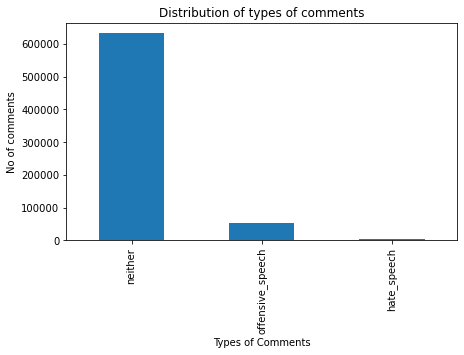

In [51]:
df['Hate_Off_Neit'].replace({"hate_speech":'hate_speech',"offensive_language":'offensive_speech',"neither":'neither'}).value_counts().plot(kind='bar',figsize=(7,4));
plt.title("Distribution of types of comments");
plt.xlabel("Types of Comments");
plt.ylabel("No of comments");

**Most Controversial comment based on no of likes, no of replies and dislikes. I think the the controversial topic is one which has received much reaction from the people. A person can react to a comment by upvoting it,downvoting it or writing a reply to it. So I think controversy score(C) can be calculated by C = (likes + dislikes + replies) that a comment has received.**

**Since our dataset doesnt include the attribute dislikes so we will modify controversy score to C = (likes + replies)**

**Changing the values of replies at some position to 0 where a string object is present in column "replies"**

In [52]:
df.iloc[[51626]]

,video_id,comment_text,likes,replies,positive,negative,neutral,compound,comment_type,cleaned_text,comment_length,Hate_Off_Neit
51626,JO7X9ZPoAp8,This comment section made me lose faith in hum...,1,0KFUIVfKTeVg,0.224,0.216,0.56,0.0258,1,comment section made lose faith humanity.,6,neither


In [53]:
df.at[51626,"replies"]="0"
df.iloc[[51626]]

,video_id,comment_text,likes,replies,positive,negative,neutral,compound,comment_type,cleaned_text,comment_length,Hate_Off_Neit
51626,JO7X9ZPoAp8,This comment section made me lose faith in hum...,1,0,0.224,0.216,0.56,0.0258,1,comment section made lose faith humanity.,6,neither


In [54]:
df.iloc[[245213]]

,video_id,comment_text,likes,replies,positive,negative,neutral,compound,comment_type,cleaned_text,comment_length,Hate_Off_Neit
245216,dInwVhRtN4E,"5:00 you said Tony Stark, it's Bruce Wayne... ...",0,103jeumSTSzc,0.0,0.0,1.0,0.0,0,"5:00 said Tony Stark, Bruce Wayne... come on!",8,neither


In [55]:
df.at[245216,"replies"]="0"
df.iloc[[245213]]

,video_id,comment_text,likes,replies,positive,negative,neutral,compound,comment_type,cleaned_text,comment_length,Hate_Off_Neit
245216,dInwVhRtN4E,"5:00 you said Tony Stark, it's Bruce Wayne... ...",0,0,0.0,0.0,1.0,0.0,0,"5:00 said Tony Stark, Bruce Wayne... come on!",8,neither


In [56]:
df[["replies"]]=df[["replies"]].apply(pd.to_numeric) #changing the type of column replies

In [57]:
df["Controversy_score"]=df["likes"]+df["replies"]
df.head()

,video_id,comment_text,likes,replies,positive,negative,neutral,compound,comment_type,cleaned_text,comment_length,Hate_Off_Neit,Controversy_score
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000,0.0,1.000,0.0000,0,Logan Paul yo big day ‼️‼️‼️,6,neither,4
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000,0.0,1.000,0.0000,0,I've following start vine channel seen 365 vlogs,8,neither,3
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000,0.0,1.000,0.0000,0,Say hi Kong maverick,4,neither,3
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.503,0.0,0.497,0.4648,1,FAN . attendance,3,neither,3
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000,0.0,1.000,0.0000,0,trending 😉,2,neither,3


# Displaying the most controversial comments in descending order by Controversy_score

In [58]:
df_most_controversial=df.sort_values(by="Controversy_score",ascending=False)
df_most_controversial.head()

,video_id,comment_text,likes,replies,positive,negative,neutral,compound,comment_type,cleaned_text,comment_length,Hate_Off_Neit,Controversy_score
167070,0R7MQwmbiQc,What if Mable was the duck??,48772,501,0.0,0.000,1.000,0.0000,0,Mable duck??,2,neither,49273
149534,0R7MQwmbiQc,What if Mable was the duck??,47785,501,0.0,0.000,1.000,0.0000,0,Mable duck??,2,neither,48286
127156,0R7MQwmbiQc,What if Mable was the duck??,45316,500,0.0,0.000,1.000,0.0000,0,Mable duck??,2,neither,45816
106257,0R7MQwmbiQc,What if Mable was the duck??,39530,500,0.0,0.000,1.000,0.0000,0,Mable duck??,2,neither,40030
653310,hkA2a4_tNOs,I thought that the sad clown emoji represented...,30228,500,0.0,0.292,0.708,-0.7351,-1,thought sad clown emoji represented Pennywise ...,9,neither,30728


# Named Entity Recognition

In [59]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

In [60]:
NER_df=df[["video_id","comment_text"]].copy()
NER_df.head()

,video_id,comment_text
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️
1,XpVt6Z1Gjjo,I've been following you from the start of your...
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me
3,XpVt6Z1Gjjo,MY FAN . attendance
4,XpVt6Z1Gjjo,trending 😉


In [61]:
df.head()

,video_id,comment_text,likes,replies,positive,negative,neutral,compound,comment_type,cleaned_text,comment_length,Hate_Off_Neit,Controversy_score
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000,0.0,1.000,0.0000,0,Logan Paul yo big day ‼️‼️‼️,6,neither,4
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000,0.0,1.000,0.0000,0,I've following start vine channel seen 365 vlogs,8,neither,3
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000,0.0,1.000,0.0000,0,Say hi Kong maverick,4,neither,3
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.503,0.0,0.497,0.4648,1,FAN . attendance,3,neither,3
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000,0.0,1.000,0.0000,0,trending 😉,2,neither,3


In [62]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [63]:
def NER(comment_index):
    return displacy.render(nlp(NER_df.at[comment_index,"comment_text"]),jupyter=True,style='ent')
for i in range(5):
    NER(i)

/opt/conda/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/opt/conda/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


# Using the TextBlob model to calculate the polarity and the objectivity of a model

we will use two features polarity and subjectivity. Polarity will tell us whether a sentence is positive,negative and subjectivity refers that whether it is a public opinion or a factual information.Polarity has a value between -1 and 1. If the polarity value is a negative, the sentence has a negative sentiment and vice versa.

In [64]:
from textblob import TextBlob
pol=[]
subject=[]
for i in df.comment_text.values:
    score=TextBlob(i)
    pol.append(score.sentiment.polarity)
    subject.append(score.sentiment.subjectivity)

In [65]:
df["polarity"]=pol
df["subjectivity"]=subject
df.head()

,video_id,comment_text,likes,replies,positive,negative,neutral,compound,comment_type,cleaned_text,comment_length,Hate_Off_Neit,Controversy_score,polarity,subjectivity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000,0.0,1.000,0.0000,0,Logan Paul yo big day ‼️‼️‼️,6,neither,4,0.0,0.1
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000,0.0,1.000,0.0000,0,I've following start vine channel seen 365 vlogs,8,neither,3,0.0,0.1
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000,0.0,1.000,0.0000,0,Say hi Kong maverick,4,neither,3,0.0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.503,0.0,0.497,0.4648,1,FAN . attendance,3,neither,3,0.0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000,0.0,1.000,0.0000,0,trending 😉,2,neither,3,0.0,0.0
